In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.style.use("fivethirtyeight")
import plotly.express as px
import plotly.graph_objects as go

pd.options.display.max_columns = 999
%load_ext nb_black

project_root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
file_path = os.path.join(project_root_dir, "data")

# function for loading data
def load_data(filename, file_path=file_path):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path)

<IPython.core.display.Javascript object>

# Bowling

In [2]:
bowling = load_data("bowling.csv")
bowling.head()

POS          PLAYER  Mat  Inns    Ov  Runs  Wkts  BBI    Avg  Econ     SR  \
0    1     Imran Tahir   17    17  64.2   431    26    0  16.57  6.69  14.84   
1    2   Kagiso Rabada   12    12  47.0   368    25    0  14.72  7.82  11.28   
2    3   Deepak Chahar   17    17  64.3   482    22    0  21.90  7.47  17.59   
3    4   Shreyas Gopal   14    14  48.0   347    20    0  17.35  7.22  14.40   
4    5  Jasprit Bumrah   16    16  61.4   409    19    0  21.52  6.63  19.47   

   4w  5w Nationality                                        Player Link  \
0   2   0    Overseas  https://www.iplt20.com/teams/chennai-super-kin...   
1   2   0    Overseas  https://www.iplt20.com/teams/delhi-capitals/sq...   
2   0   0      Indian  https://www.iplt20.com/teams/chennai-super-kin...   
3   0   0      Indian  https://www.iplt20.com/teams/rajasthan-royals/...   
4   0   0      Indian  https://www.iplt20.com/teams/mumbai-indians/sq...   

                  Team   Dots  Maid  Season  
0  Chennai Super Kings  149.0   1.0    2019  
1       Delhi Capitals  113.0   0.0    2019  
2  Chennai Super Kings  190.0   2.0    2019  
3     Rajasthan Royals  107.0   1.0    2019  
4       Mumbai Indians  169.0   1.0    2019

<IPython.core.display.Javascript object>

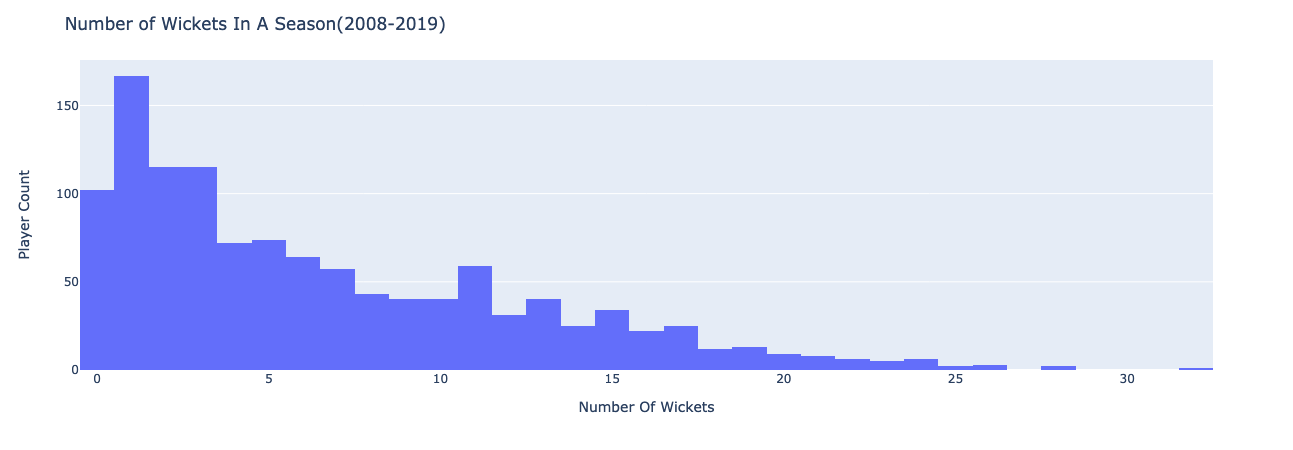

<IPython.core.display.Javascript object>

In [3]:
fig = px.histogram(bowling, x="Wkts")
fig.update_layout(
    title="Number of Wickets In A Season(2008-2019)",
    yaxis=dict(title="Player Count"),
    xaxis=dict(title="Number Of Wickets"),
)
fig.show()

In [4]:
bowling["Wkts"].describe()

count    1192.000000
mean        6.613255
std         5.936603
min         0.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        32.000000
Name: Wkts, dtype: float64

<IPython.core.display.Javascript object>

As we can see that the distribution is right skewed. Lots of players have very low or medium number of wickets in a
season and very few have higher numbers of wickets in a season. 50% of the players takes less than 5 wickets and 50% 
takes greater than 5 wickets. and 75% takes less than 11 wickets. The range is 32 wickets. 

In [5]:
np.percentile(bowling["Wkts"], 90)

15.0

<IPython.core.display.Javascript object>

In [6]:
# what is the probabilty that someone will take 15 wickets
len(bowling[bowling["Wkts"] > 15]) / len(bowling) * 100

9.563758389261745

<IPython.core.display.Javascript object>

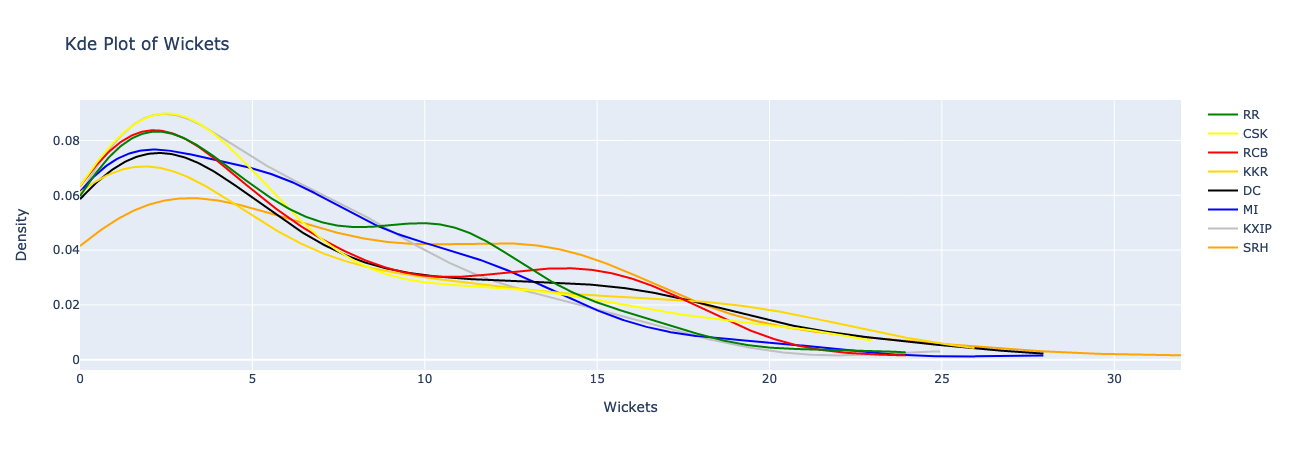

<IPython.core.display.Javascript object>

In [7]:
import plotly.figure_factory as ff

unique_teams = bowling["Team"].unique()

hist_data = [
    bowling[bowling["Team"] == team]["Wkts"] for team in unique_teams if team != "Nan"
]
group_labels = ["SRH", "KXIP", "MI", "DC", "KKR", "RCB", "CSK", "RR"]
colors = ["Orange", "Silver", "Blue", "Black", "Gold", "Red", "Yellow", "Green"]

fig = ff.create_distplot(
    hist_data, group_labels, show_hist=False, show_rug=False, colors=colors
)
fig.update_layout(
    title="Kde Plot of Wickets",
    xaxis=dict(title="Wickets"),
    yaxis=dict(title="Density"),
)
fig.show()

In [8]:
bowling_players_list = list(bowling["PLAYER"].unique())
bowling_players_list[:5]

['Imran Tahir',
 'Kagiso Rabada',
 'Deepak Chahar',
 'Shreyas Gopal',
 'Jasprit Bumrah']

<IPython.core.display.Javascript object>

In [9]:
team_season_wkts = bowling.groupby(["Team", "Season"])["Wkts"].sum().reset_index()
team_season_wkts = team_season_wkts[team_season_wkts["Team"] != "Nan"]
team_season_wkts

Team  Season  Wkts
0   Chennai Super Kings    2008    83
1   Chennai Super Kings    2009    84
2   Chennai Super Kings    2010    89
3   Chennai Super Kings    2011    83
4   Chennai Super Kings    2012    94
..                  ...     ...   ...
91  Sunrisers Hyderabad    2015    72
92  Sunrisers Hyderabad    2016    88
93  Sunrisers Hyderabad    2017    88
94  Sunrisers Hyderabad    2018    94
95  Sunrisers Hyderabad    2019    82

[87 rows x 3 columns]

<IPython.core.display.Javascript object>

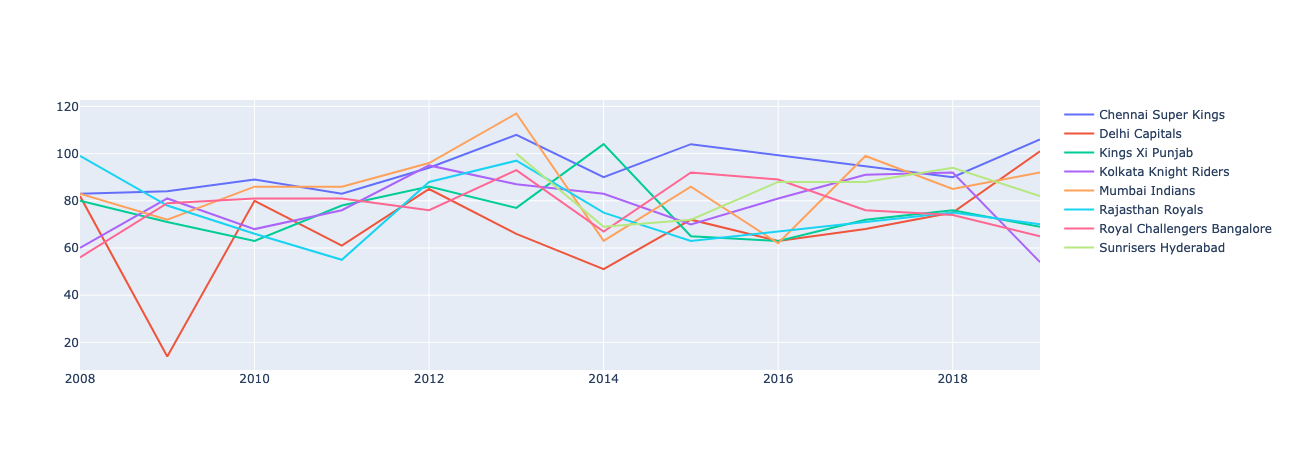

<IPython.core.display.Javascript object>

In [10]:
fig = go.Figure()
unique_teams = team_season_wkts["Team"].unique()
for team in unique_teams:
    fig.add_trace(
        go.Scatter(
            x=team_season_wkts[team_season_wkts["Team"] == team]["Season"],
            y=team_season_wkts[team_season_wkts["Team"] == team]["Wkts"],
            mode="lines",
            name=team,
        )
    )
fig.show()

In [11]:
bowling.groupby("Team")["Wkts"].mean().reset_index().sort_values(
    by="Wkts", ascending=False
).round(0)

Team  Wkts
0          Chennai Super Kings   9.0
4               Mumbai Indians   7.0
8          Sunrisers Hyderabad   7.0
2              Kings Xi Punjab   7.0
3        Kolkata Knight Riders   6.0
7  Royal Challengers Bangalore   6.0
6             Rajasthan Royals   6.0
1               Delhi Capitals   6.0
5                          Nan   6.0

<IPython.core.display.Javascript object>

In [12]:
bowling.groupby("Team")["Wkts"].median().reset_index().sort_values(
    by="Wkts", ascending=False
).round(0)

Team  Wkts
0          Chennai Super Kings   7.0
6             Rajasthan Royals   6.0
1               Delhi Capitals   5.0
2              Kings Xi Punjab   5.0
3        Kolkata Knight Riders   5.0
4               Mumbai Indians   5.0
5                          Nan   4.0
7  Royal Challengers Bangalore   4.0
8          Sunrisers Hyderabad   4.0

<IPython.core.display.Javascript object>

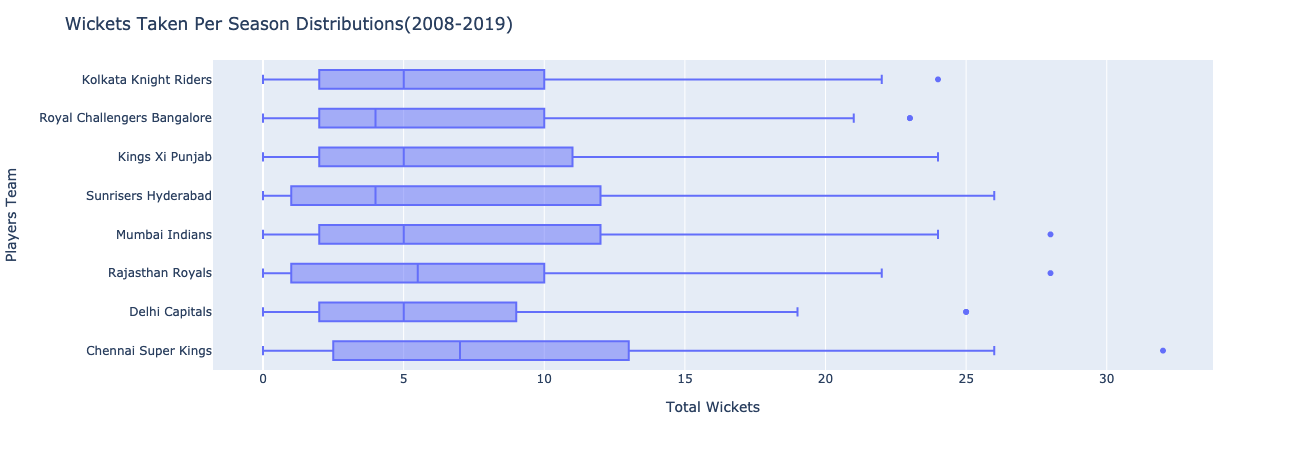

<IPython.core.display.Javascript object>

In [13]:
fig = px.box(bowling[bowling["Team"] != "Nan"], x="Wkts", y="Team")
fig.update_layout(
    title="Wickets Taken Per Season Distributions(2008-2019)",
    yaxis=dict(title="Players Team"),
    xaxis=dict(title="Total Wickets"),
)
fig.show()

On average, Chennai Super Kings bowlers also perform better than any other teams. Rajasthan Royals has some good
balance in their team which is why their median wickets is second highest after CSK but overall gets outperformed
by other teams. We can see their is a lot of variability in Sunrisers Hyderabad Team. They have really some high wickets takers but team is not much balanced. Out of all Royal challengers Banglore and Delhi Capitals is performing
very poorly. 

In [14]:
srh_bowling = bowling[bowling["Team"] == "Sunrisers Hyderabad"]

<IPython.core.display.Javascript object>

In [15]:
srh_bowling.groupby("PLAYER")["Wkts"].mean().reset_index().sort_values(
    by="Wkts", ascending=False
)

PLAYER       Wkts
36     Thisara Perera  19.000000
30        Rashid Khan  18.333333
8   Bhuvneshwar Kumar  18.166667
35      Siddarth Kaul  14.333333
5       Barinder Sran  14.000000
1         Amit Mishra  14.000000
32     Sandeep Sharma  12.000000
14         Dale Steyn  11.000000
25     Mohammed Siraj  10.000000
23      Khaleel Ahmed   9.500000
22        Karn Sharma   9.000000
3        Ashish Nehra   8.500000
27  Mustafizur Rahman   8.500000
34    Shakib Al Hasan   8.000000
29      Praveen Kumar   7.000000
26   Moises Henriques   7.000000
19      Ishant Sharma   6.333333
31        Ravi Bopara   6.000000
15       Darren Sammy   5.500000
37        Trent Boult   5.000000
12  Carlos Brathwaite   5.000000
9      Billy Stanlake   5.000000
18       Irfan Pathan   4.000000
24      Mohammad Nabi   3.666667
7         Ben Cutting   3.000000
10       Bipul Sharma   3.000000
6        Basil Thampi   2.500000
4        Ashish Reddy   2.333333
2         Anand Rajan   2.000000
33     Shahbaz Nadeem   2.000000
16       Deepak Hooda   1.500000
20       Jason Holder   1.000000
11      Cameron White   1.000000
39      Vijay Shankar   1.000000
28     Parveez Rasool   1.000000
17      Hanuma Vihari   1.000000
0     Abhishek Sharma   1.000000
40       Yusuf Pathan   0.500000
41       Yuvraj Singh   0.500000
13       Chris Jordan   0.500000
38      Venugopal Rao   0.000000
21    Kane Williamson   0.000000

<IPython.core.display.Javascript object>

In [16]:
top_15_wkts = (
    bowling.groupby("PLAYER")["Wkts"]
    .sum()
    .reset_index()
    .sort_values(by="Wkts", ascending=False)[:15]
)
top_15_wkts

PLAYER  Wkts
174       Lasith Malinga   170
23           Amit Mishra   157
240        Piyush Chawla   150
112      Harbhajan Singh   150
103         Dwayne Bravo   147
60     Bhuvneshwar Kumar   133
264  Ravichandran Ashwin   125
330         Sunil Narine   122
350          Umesh Yadav   119
265      Ravindra Jadeja   108
124        Ishant Sharma   105
360          Vinay Kumar   105
372          Zaheer Khan   102
371     Yuzvendra Chahal   100
82            Dale Steyn    96

<IPython.core.display.Javascript object>

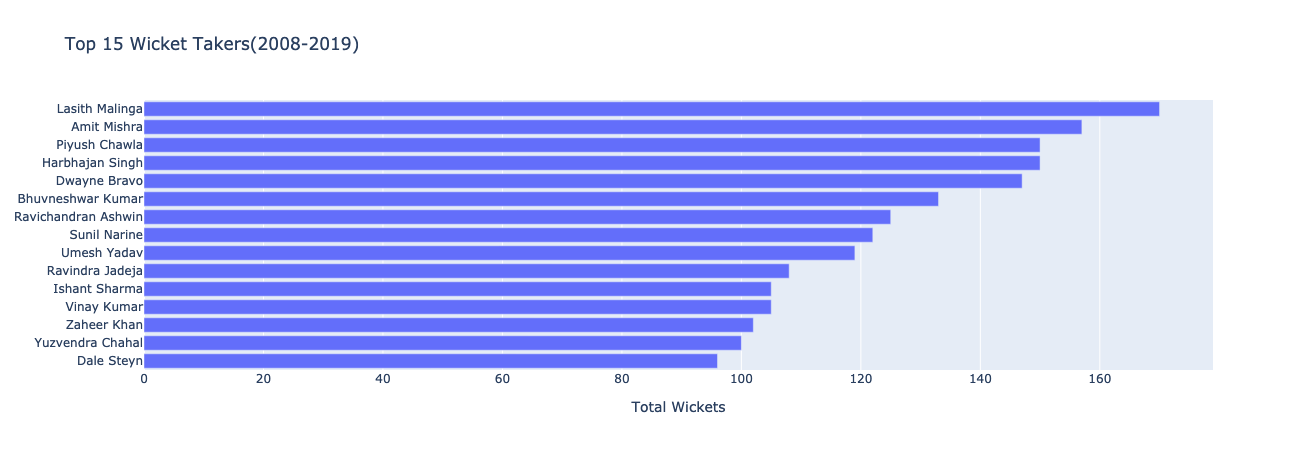

<IPython.core.display.Javascript object>

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=top_15_wkts["Wkts"], y=top_15_wkts["PLAYER"], orientation="h"))
fig.update_layout(
    title="Top 15 Wicket Takers(2008-2019)",
    xaxis=dict(title="Total Wickets"),
    yaxis=dict(autorange="reversed"),
)
fig.show()

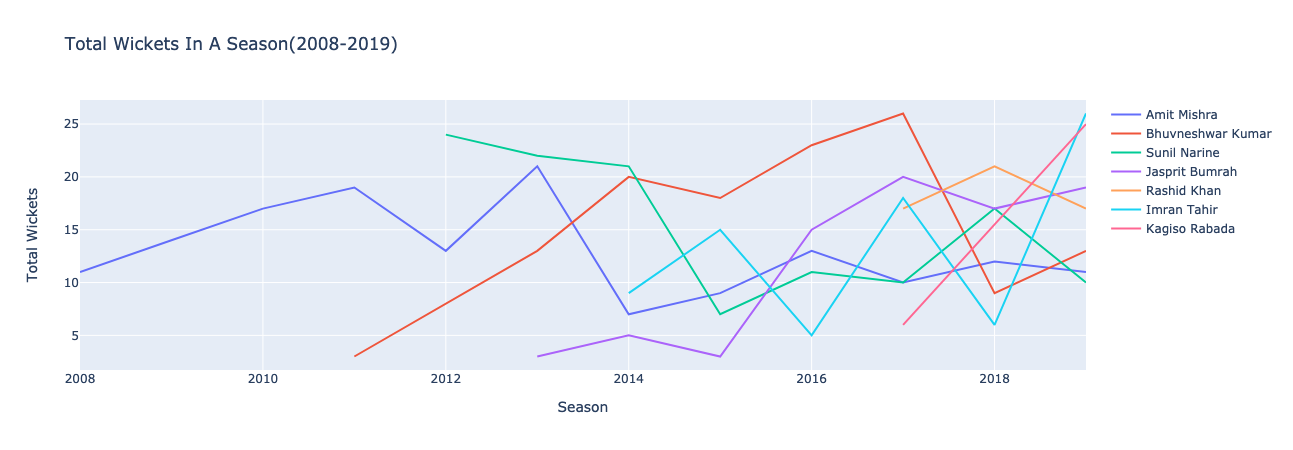

<IPython.core.display.Javascript object>

In [18]:
fig = go.Figure()
player_list = [
    "Amit Mishra",
    "Bhuvneshwar Kumar",
    "Sunil Narine",
    "Jasprit Bumrah",
    "Rashid Khan",
    "Imran Tahir",
    "Kagiso Rabada",
]
for player in player_list:
    fig.add_trace(
        go.Scatter(
            x=bowling[bowling["PLAYER"] == player]["Season"],
            y=bowling[bowling["PLAYER"] == player]["Wkts"],
            mode="lines",
            name=player,
        )
    )
fig.update_layout(
    title="Total Wickets In A Season(2008-2019)",
    yaxis=dict(title="Total Wickets"),
    xaxis=dict(title="Season"),
)
fig.show()

In [19]:
more_than_13 = bowling[bowling["Wkts"] > 13]

<IPython.core.display.Javascript object>

In [20]:
more_than_13.groupby("PLAYER")["Wkts"]

<IPython.core.display.Javascript object>

In [21]:
# Number of times a plater taken more than 13 wickets
more_than_13 = (
    bowling[bowling["Wkts"] > 13]["PLAYER"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Player", "PLAYER": "Count"})
)

<IPython.core.display.Javascript object>

In [22]:
bowling_2014 = bowling[bowling["Season"] > 2013]

<IPython.core.display.Javascript object>

In [23]:
# Number of times a plater taken more than 13 wickets
more_than_13 = (
    bowling_2014[bowling_2014["Wkts"] > 13]["PLAYER"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Player", "PLAYER": "Count"})
)

<IPython.core.display.Javascript object>

In [24]:
more_than_13[:10]

Player  Count
0  Mitchell McClenaghan      4
1        Jasprit Bumrah      4
2     Bhuvneshwar Kumar      4
3      Yuzvendra Chahal      4
4          Dwayne Bravo      3
5        Lasith Malinga      3
6           Rashid Khan      3
7           Imran Tahir      3
8       Harbhajan Singh      3
9        Sandeep Sharma      3

<IPython.core.display.Javascript object>

In [25]:
bowling_2014_avg = (
    bowling_2014.groupby("PLAYER")["Wkts"]
    .mean()
    .round(1)
    .reset_index()
    .sort_values(by="Wkts", ascending=False)[:15]
)
bowling_2014_avg

PLAYER  Wkts
167           Rashid Khan  18.3
31      Bhuvneshwar Kumar  18.2
54           Dwayne Bravo  17.0
126        Mitchell Starc  17.0
106        Lasith Malinga  16.8
228      Yuzvendra Chahal  16.7
48            David Wiese  16.0
90          Kagiso Rabada  15.5
183        Sandeep Sharma  14.5
124  Mitchell McClenaghan  14.2
78         Jasprit Bumrah  13.2
66            Imran Tahir  13.2
9              Andrew Tye  13.0
83           Jofra Archer  13.0
216           Umesh Yadav  12.7

<IPython.core.display.Javascript object>

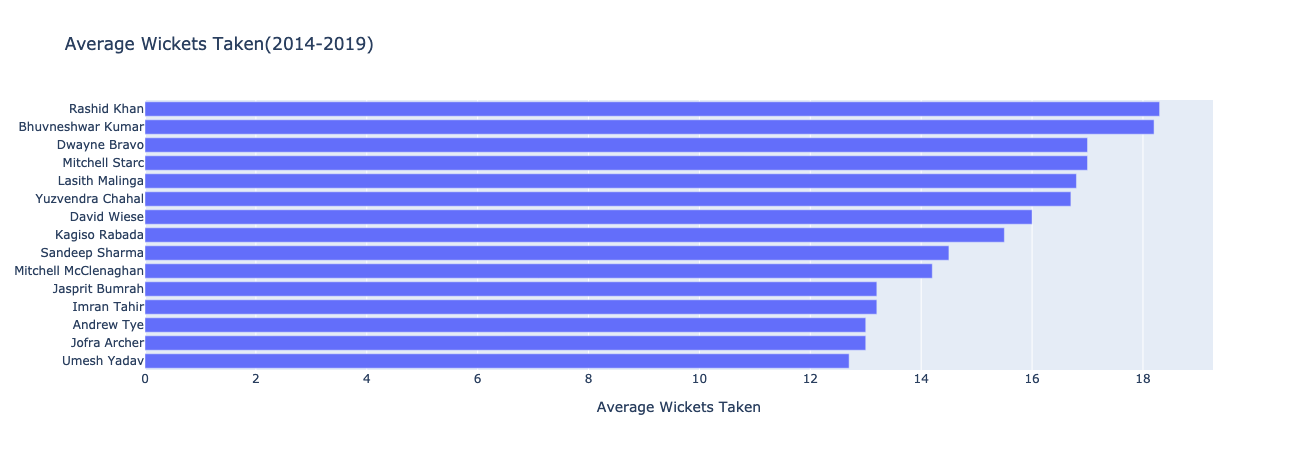

<IPython.core.display.Javascript object>

In [26]:
fig = go.Figure()
fig.add_trace(
    go.Bar(x=bowling_2014_avg["Wkts"], y=bowling_2014_avg["PLAYER"], orientation="h")
)
fig.update_layout(
    title="Average Wickets Taken(2014-2019)",
    xaxis=dict(title="Average Wickets Taken"),
    yaxis=dict(autorange="reversed"),
)
fig.show()

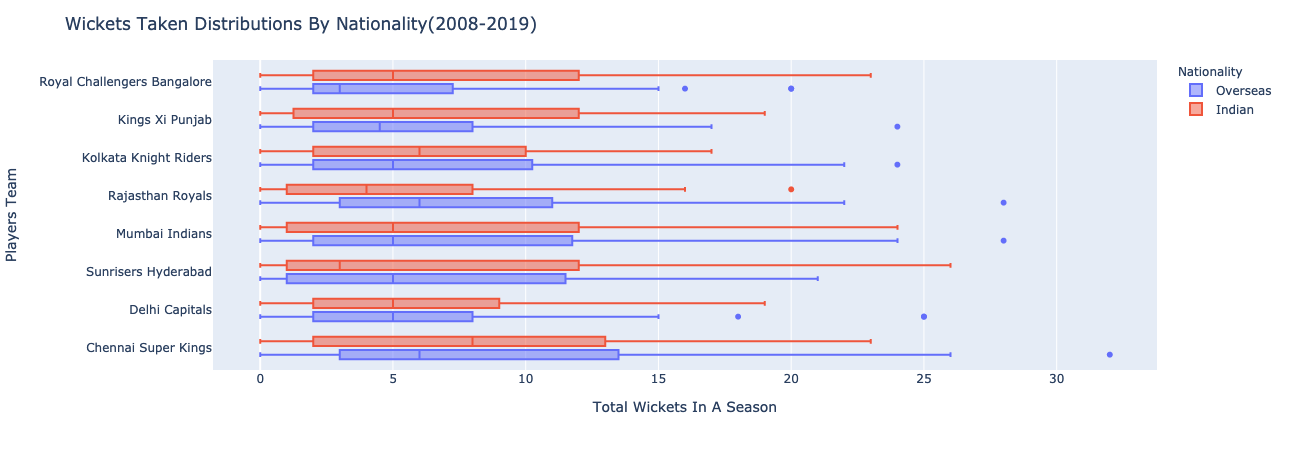

<IPython.core.display.Javascript object>

In [27]:
fig = px.box(bowling[bowling["Team"] != "Nan"], x="Wkts", y="Team", color="Nationality")
fig.update_layout(
    title="Wickets Taken Distributions By Nationality(2008-2019)",
    yaxis=dict(title="Players Team"),
    xaxis=dict(title="Total Wickets In A Season"),
)
fig.show()

* Indian Players - CSK, DC, KKR,KXIP,RCB

* Overseas Players - SRH, MI, RR

In [28]:
bowling.groupby(["Team", "Nationality"])["Wkts"].describe().reset_index()

Team Nationality  count      mean       std  min  \
0           Chennai Super Kings      Indian   60.0  8.683333  6.523729  0.0   
1           Chennai Super Kings    Overseas   48.0  8.541667  7.234546  0.0   
2                Delhi Capitals      Indian   75.0  5.813333  4.649014  0.0   
3                Delhi Capitals    Overseas   62.0  6.161290  5.709335  0.0   
4               Kings Xi Punjab      Indian   99.0  6.696970  5.899593  0.0   
5               Kings Xi Punjab    Overseas   40.0  6.025000  5.599851  0.0   
6         Kolkata Knight Riders      Indian   74.0  6.283784  4.615401  0.0   
7         Kolkata Knight Riders    Overseas   73.0  6.479452  5.911640  0.0   
8                Mumbai Indians      Indian   81.0  6.790123  6.353574  0.0   
9                Mumbai Indians    Overseas   61.0  7.819672  7.258347  0.0   
10                          Nan      Indian  101.0  6.059406  5.563851  0.0   
11                          Nan    Overseas   64.0  5.703125  4.665577  0.0   
12             Rajasthan Royals      Indian   74.0  5.175676  4.729268  0.0   
13             Rajasthan Royals    Overseas   50.0  7.660000  6.153181  0.0   
14  Royal Challengers Bangalore      Indian   85.0  7.152941  6.585529  0.0   
15  Royal Challengers Bangalore    Overseas   61.0  5.262295  5.056025  0.0   
16          Sunrisers Hyderabad      Indian   52.0  7.076923  7.321326  0.0   
17          Sunrisers Hyderabad    Overseas   32.0  7.031250  6.717740  0.0   

     25%  50%    75%   max  
0   2.00  8.0  13.00  23.0  
1   3.00  6.0  13.25  32.0  
2   2.00  5.0   9.00  19.0  
3   2.00  5.0   8.00  25.0  
4   1.50  5.0  12.00  19.0  
5   2.00  4.5   8.00  24.0  
6   2.00  6.0  10.00  17.0  
7   2.00  5.0  10.00  24.0  
8   1.00  5.0  12.00  24.0  
9   2.00  5.0  11.00  28.0  
10  2.00  4.0   9.00  24.0  
11  2.00  4.5   8.25  18.0  
12  1.00  4.0   7.75  20.0  
13  3.25  6.0  10.75  28.0  
14  2.00  5.0  12.00  23.0  
15  2.00  3.0   7.00  20.0  
16  1.00  3.0  12.00  26.0  
17  1.00  5.0  11.25  21.0

<IPython.core.display.Javascript object>

In [29]:
csk_2019_df = bowling[
    (bowling["Team"] == "Chennai Super Kings") & (bowling["Season"] == 2019)
]

csk_2019_wkts = (
    csk_2019_df.groupby("PLAYER")["Wkts"]
    .sum()
    .reset_index()
    .sort_values(by="Wkts", ascending=False)
)
csk_2019_wkts

PLAYER  Wkts
3        Imran Tahir    26
0      Deepak Chahar    22
2    Harbhajan Singh    16
7    Ravindra Jadeja    15
1       Dwayne Bravo    11
9     Shardul Thakur     8
5   Mitchell Santner     4
8   Scott Kuggeleijn     2
4        Karn Sharma     1
6       Mohit Sharma     1
10      Suresh Raina     0

<IPython.core.display.Javascript object>

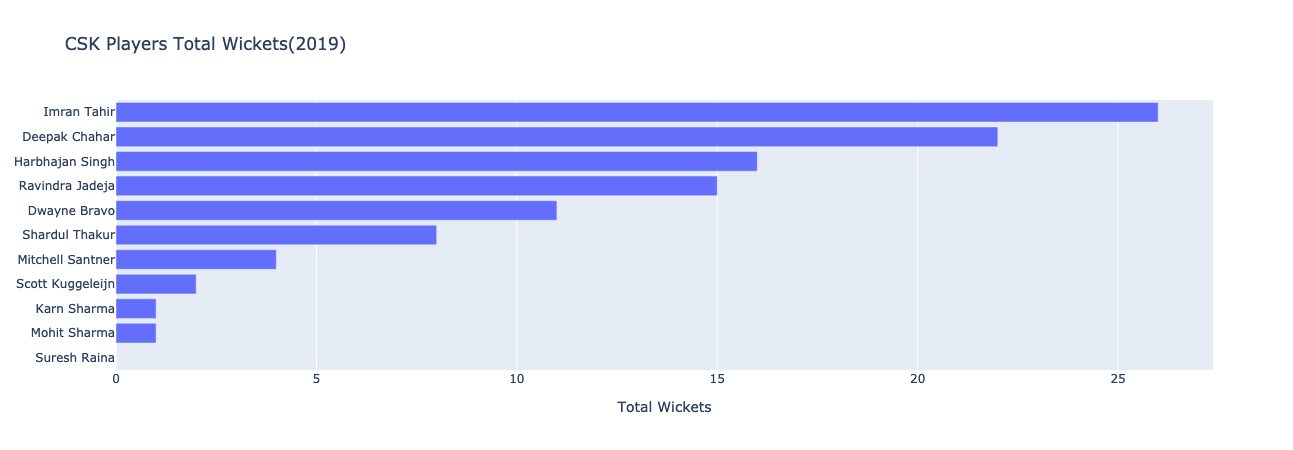

<IPython.core.display.Javascript object>

In [30]:
fig = go.Figure()
fig.add_trace(
    go.Bar(x=csk_2019_wkts["Wkts"], y=csk_2019_wkts["PLAYER"], orientation="h")
)
fig.update_layout(
    title="CSK Players Total Wickets(2019)",
    yaxis=dict(autorange="reversed"),
    xaxis=dict(title="Total Wickets"),
)

fig.show()

### correlation

In [31]:
corr_mat = bowling.corr()

<IPython.core.display.Javascript object>

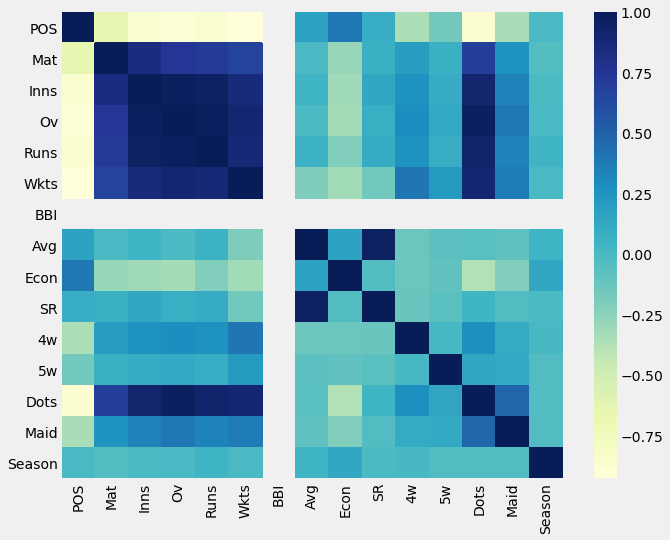

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap="YlGnBu")

In [33]:
corr_mat["Wkts"].sort_values(ascending=False)

Wkts      1.000000
Ov        0.904428
Dots      0.896949
Runs      0.874229
Inns      0.858274
Mat       0.665100
4w        0.411590
Maid      0.376675
5w        0.220988
Season    0.004617
SR       -0.145284
Avg      -0.203147
Econ     -0.320273
POS      -0.926705
BBI            NaN
Name: Wkts, dtype: float64

<IPython.core.display.Javascript object>

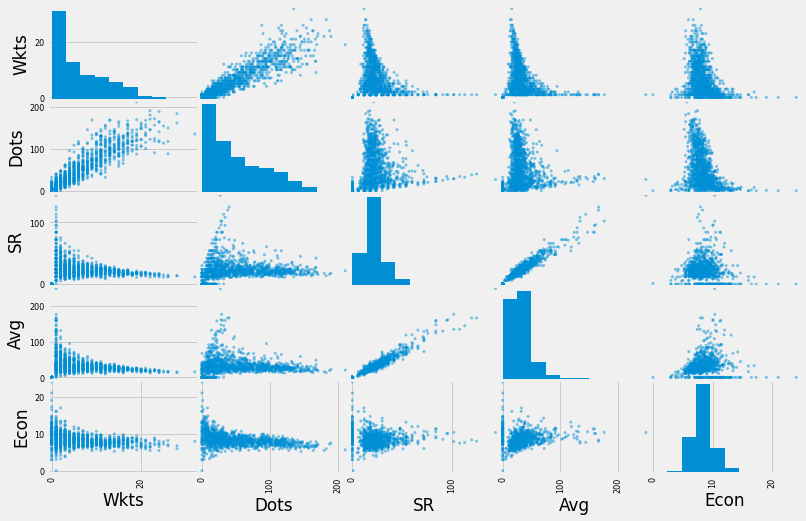

<IPython.core.display.Javascript object>

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["Wkts", "Dots", "SR", "Avg", "Econ"]
scatter_matrix(bowling[attributes], figsize=(12, 8));

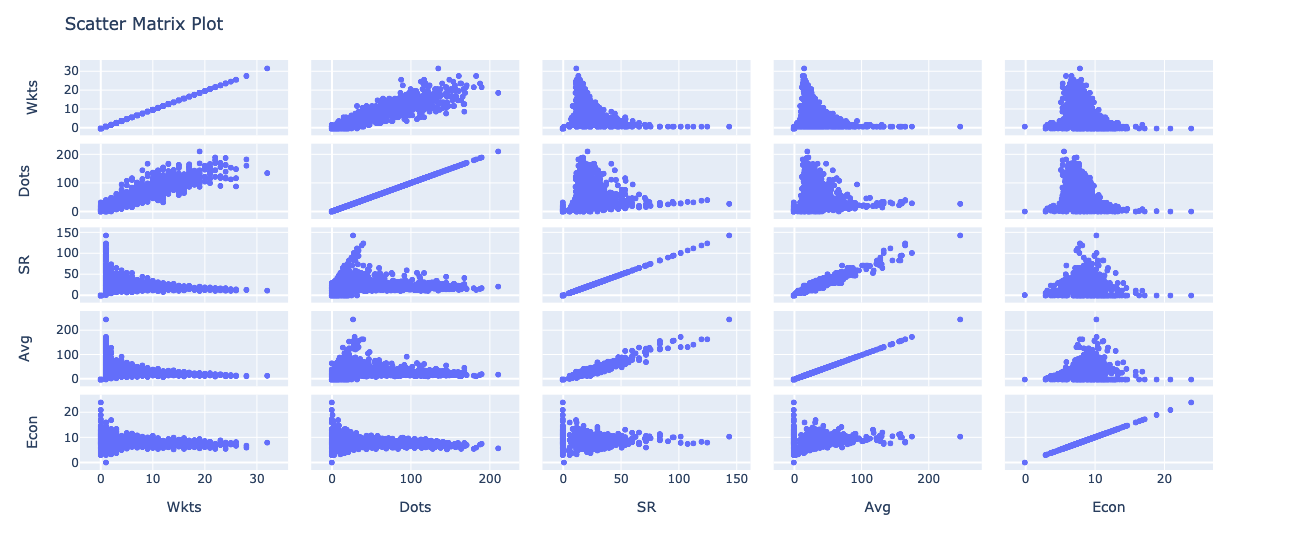

<IPython.core.display.Javascript object>

In [36]:
import plotly.express as px

fig = px.scatter_matrix(bowling, dimensions=["Wkts", "Dots", "SR", "Avg", "Econ"])
fig.update_layout(title="Scatter Matrix Plot", height=550)
fig.show()

In [37]:
bowling["Ov"].describe()

count    1192.000000
mean       23.523742
std        17.784712
min         0.100000
25%         8.000000
50%        19.000000
75%        38.225000
max        70.000000
Name: Ov, dtype: float64

<IPython.core.display.Javascript object>

In [38]:
more_than_30_ov = bowling[bowling["Ov"] > 30]
more_than_30_ov.head()

POS          PLAYER  Mat  Inns    Ov  Runs  Wkts  BBI    Avg  Econ     SR  \
0    1     Imran Tahir   17    17  64.2   431    26    0  16.57  6.69  14.84   
1    2   Kagiso Rabada   12    12  47.0   368    25    0  14.72  7.82  11.28   
2    3   Deepak Chahar   17    17  64.3   482    22    0  21.90  7.47  17.59   
3    4   Shreyas Gopal   14    14  48.0   347    20    0  17.35  7.22  14.40   
4    5  Jasprit Bumrah   16    16  61.4   409    19    0  21.52  6.63  19.47   

   4w  5w Nationality                                        Player Link  \
0   2   0    Overseas  https://www.iplt20.com/teams/chennai-super-kin...   
1   2   0    Overseas  https://www.iplt20.com/teams/delhi-capitals/sq...   
2   0   0      Indian  https://www.iplt20.com/teams/chennai-super-kin...   
3   0   0      Indian  https://www.iplt20.com/teams/rajasthan-royals/...   
4   0   0      Indian  https://www.iplt20.com/teams/mumbai-indians/sq...   

                  Team   Dots  Maid  Season  
0  Chennai Super Kings  149.0   1.0    2019  
1       Delhi Capitals  113.0   0.0    2019  
2  Chennai Super Kings  190.0   2.0    2019  
3     Rajasthan Royals  107.0   1.0    2019  
4       Mumbai Indians  169.0   1.0    2019

<IPython.core.display.Javascript object>

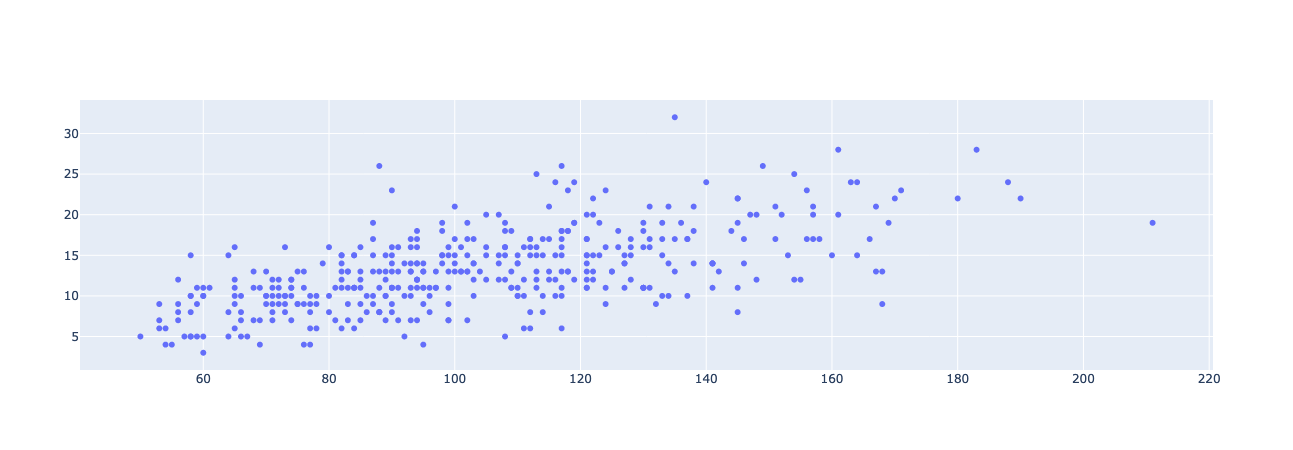

<IPython.core.display.Javascript object>

In [39]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=more_than_30_ov["Dots"], y=more_than_30_ov["Wkts"], mode="markers")
)
fig.show()

In [40]:
corr_new = more_than_30_ov.corr()
corr_new["Wkts"].sort_values(ascending=False)

Wkts      1.000000
Ov        0.666496
Dots      0.615979
Inns      0.561273
Runs      0.548284
Mat       0.505289
4w        0.372512
5w        0.258498
Maid      0.169211
Season    0.078253
Econ     -0.190008
Avg      -0.749665
SR       -0.752777
POS      -0.900266
BBI            NaN
Name: Wkts, dtype: float64

<IPython.core.display.Javascript object>

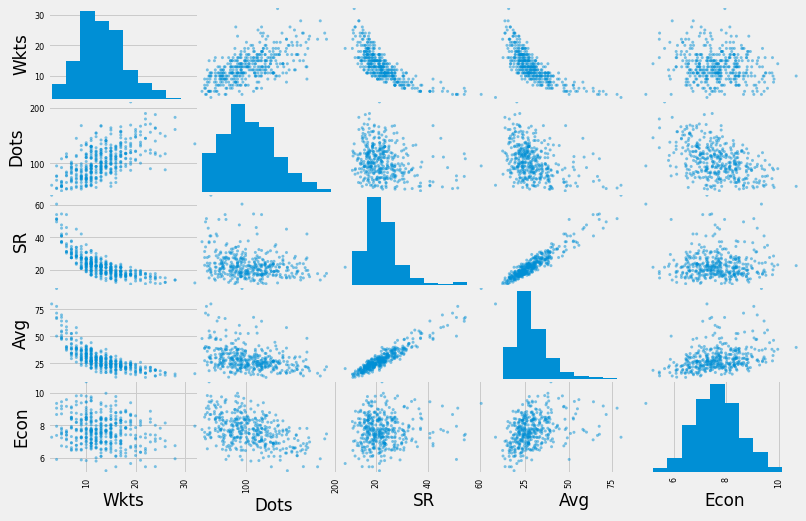

<IPython.core.display.Javascript object>

In [42]:
from pandas.plotting import scatter_matrix

attributes = ["Wkts", "Dots", "SR", "Avg", "Econ"]
scatter_matrix(more_than_30_ov[attributes], figsize=(12, 8));

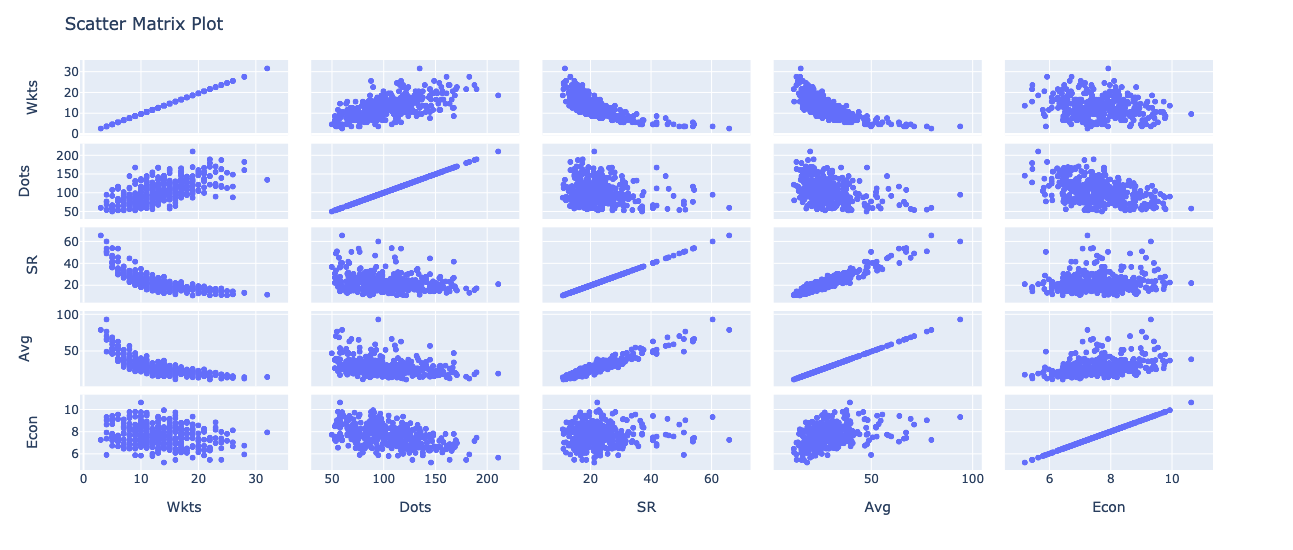

<IPython.core.display.Javascript object>

In [43]:
import plotly.express as px

fig = px.scatter_matrix(
    more_than_30_ov, dimensions=["Wkts", "Dots", "SR", "Avg", "Econ"]
)
fig.update_layout(title="Scatter Matrix Plot", height=550)
fig.show()

### Bowling Strike Rate

In [44]:
bowling.head()

POS          PLAYER  Mat  Inns    Ov  Runs  Wkts  BBI    Avg  Econ     SR  \
0    1     Imran Tahir   17    17  64.2   431    26    0  16.57  6.69  14.84   
1    2   Kagiso Rabada   12    12  47.0   368    25    0  14.72  7.82  11.28   
2    3   Deepak Chahar   17    17  64.3   482    22    0  21.90  7.47  17.59   
3    4   Shreyas Gopal   14    14  48.0   347    20    0  17.35  7.22  14.40   
4    5  Jasprit Bumrah   16    16  61.4   409    19    0  21.52  6.63  19.47   

   4w  5w Nationality                                        Player Link  \
0   2   0    Overseas  https://www.iplt20.com/teams/chennai-super-kin...   
1   2   0    Overseas  https://www.iplt20.com/teams/delhi-capitals/sq...   
2   0   0      Indian  https://www.iplt20.com/teams/chennai-super-kin...   
3   0   0      Indian  https://www.iplt20.com/teams/rajasthan-royals/...   
4   0   0      Indian  https://www.iplt20.com/teams/mumbai-indians/sq...   

                  Team   Dots  Maid  Season  
0  Chennai Super Kings  149.0   1.0    2019  
1       Delhi Capitals  113.0   0.0    2019  
2  Chennai Super Kings  190.0   2.0    2019  
3     Rajasthan Royals  107.0   1.0    2019  
4       Mumbai Indians  169.0   1.0    2019

<IPython.core.display.Javascript object>

In [45]:
bowling["SR"].describe()

count    1192.000000
mean       23.126904
std        15.570548
min         0.000000
25%        15.600000
50%        21.000000
75%        27.600000
max       144.000000
Name: SR, dtype: float64

<IPython.core.display.Javascript object>

In [46]:
np.percentile(bowling["SR"], 10)

8.5

<IPython.core.display.Javascript object>

When it comes to bowling having a lower strike rate is better, so a strike rate lower than 15 or 10 would be a cut off
to spot good bowlers. 

### Bowling Average

In [47]:
bowling["Avg"].describe()

count    1192.000000
mean       32.098297
std        24.209255
min         0.000000
25%        20.500000
50%        27.335000
75%        38.135000
max       248.000000
Name: Avg, dtype: float64

<IPython.core.display.Javascript object>

And for bowling average, a player having a bowling average less than 20 is good. You can lower the cut-off if you want
but depending upon your situation.